In [ ]:
from google.colab import files
from datetime import timedelta

uploaded = files.upload()

Saving Demographics Data (Age) - Texas.csv to Demographics Data (Age) - Texas.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv('/content/Demographics Data (Age) - Texas.csv')

counties_to_filter = ['Hidalgo County', 'Cameron County'] # Example list of counties

df = df[df['CTYNAME'].isin(counties_to_filter)]

df = df[df['YEAR'] == 5]

df

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,POPESTIMATE,POPEST_MALE,POPEST_FEM,UNDER5_TOT,...,AGE7579_FEM,AGE8084_TOT,AGE8084_MALE,AGE8084_FEM,AGE85PLUS_TOT,AGE85PLUS_MALE,AGE85PLUS_FEM,MEDIAN_AGE_TOT,MEDIAN_AGE_MALE,MEDIAN_AGE_FEM
154,50,48,61,Texas,Cameron County,5,426710,211173,215537,29717,...,6841,7814,3410,4404,6867,2628,4239,33.0,31.4,34.8
539,50,48,215,Texas,Hidalgo County,5,898471,443957,454514,68354,...,11845,13638,5810,7828,11849,4678,7171,30.8,29.8,31.8


In [ ]:
# prompt: drop columns by number

# Assuming 'filtered_df' is defined from the previous code block.

# Drop columns by index (column number)
columns_to_drop = [0, 1, 2, 3, 5, 6, 7] + list(range(8, 39)) + [-1, -2, -3]# Replace with actual column indices you want to drop
df = df.drop(df.columns[columns_to_drop], axis=1)

columns_to_drop = list(range(1, 54, 3))
filtered_df = df.drop(df.columns[columns_to_drop], axis=1)

filtered_df

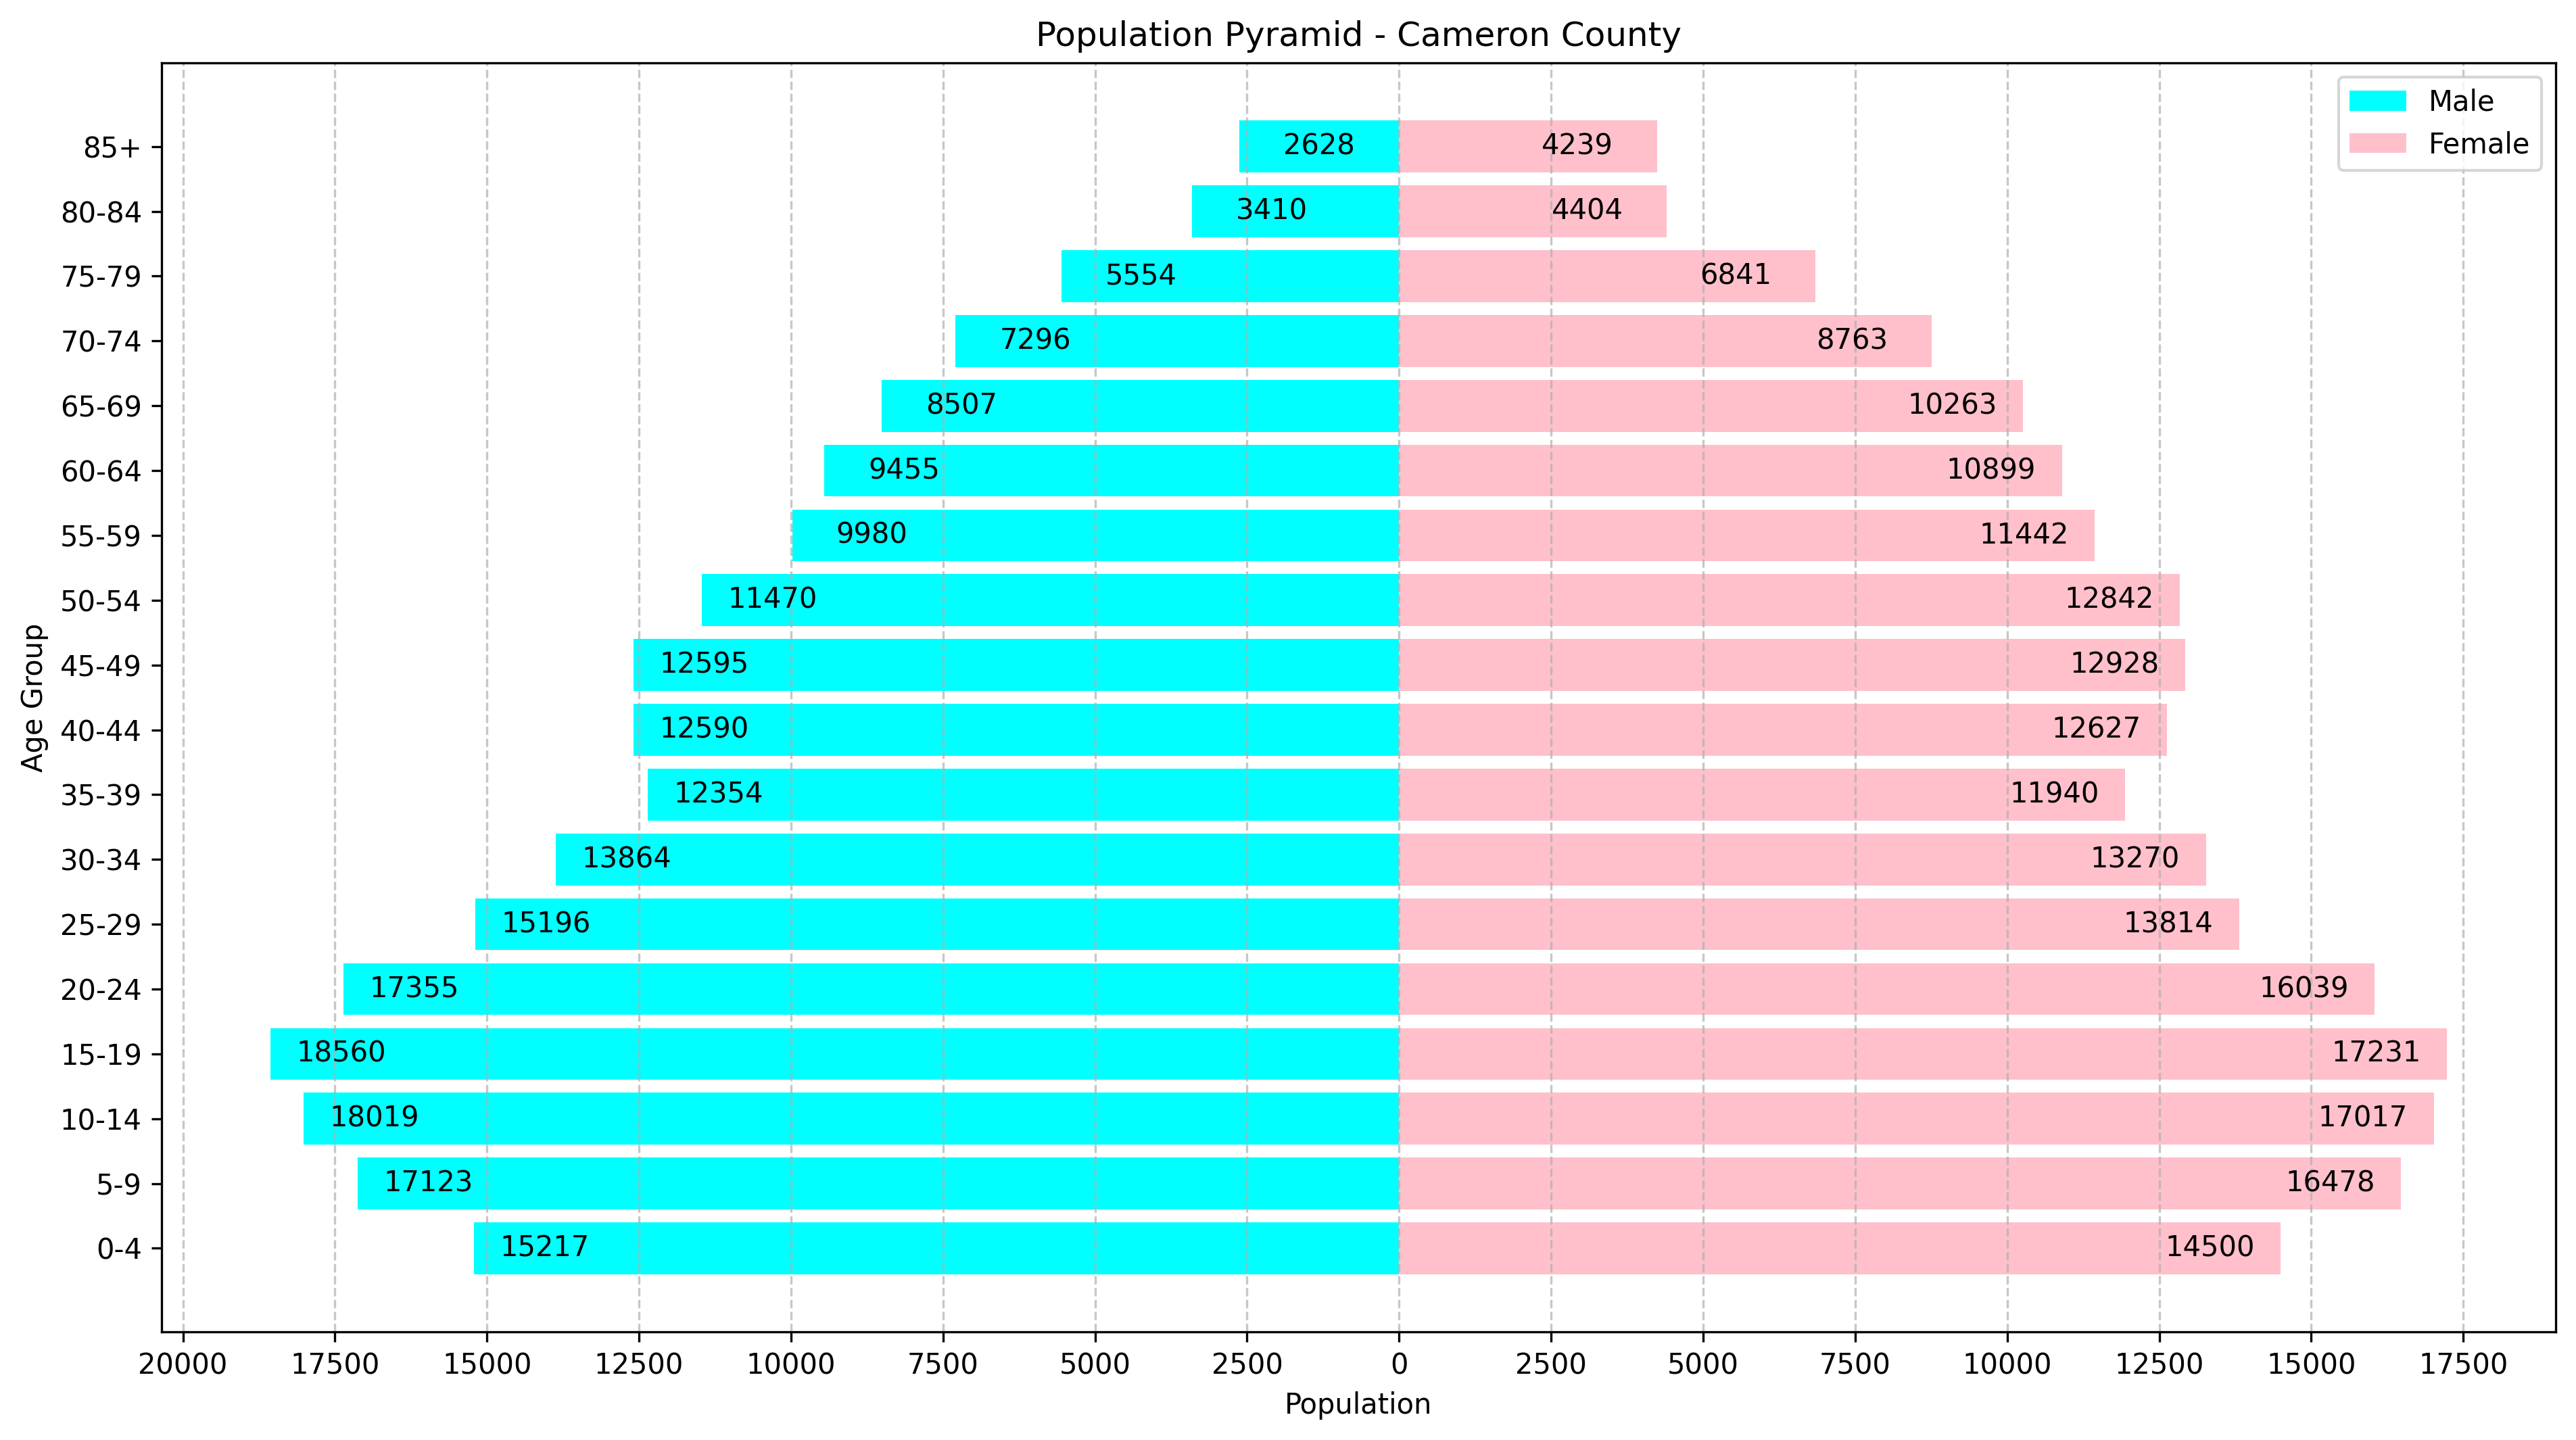

In [ ]:
df_cameron = filtered_df[filtered_df['CTYNAME'] == 'Cameron County']
age = ["0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80-84", "85+"]
data_list = df_cameron.values.tolist()
data_list = data_list[0]
male = data_list[1:len(data_list):2]
female = data_list[2:len(data_list):2]

df_cameron = pd.DataFrame({
    "Age": age,
    "Male": male,
    "Female": female
})

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=300)

# Plot Male Population (negative for left alignment)
male_bars = ax.barh(df_cameron["Age"], -df_cameron["Male"], color='cyan', label='Male')

# Plot Female Population
female_bars = ax.barh(df_cameron["Age"], df_cameron["Female"], color='pink', label='Female')

# Annotate Male Bars
for bar in male_bars:
    ax.text(bar.get_width() + 1900, bar.get_y() + bar.get_height() / 2,
            f"{-int(bar.get_width())}", va='center', ha='right', color='black', fontsize=10)

# Annotate Female Bars
for bar in female_bars:
    ax.text(bar.get_width() - 1900, bar.get_y() + bar.get_height() / 2,
            f"{int(bar.get_width())}", va='center', ha='left', color='black', fontsize=10)


# Add Labels and Title
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.set_title("Population Pyramid - Cameron County")
ax.legend(loc="upper right")

# Add X-ticks
xticks = list(range(-20000, 20000, 2500))  # Adjust based on population range
ax.set_xticks(xticks)
ax.set_xticklabels([abs(x) for x in xticks])

# Add Gridlines
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig("Cameron.png", dpi=300)
plt.show()

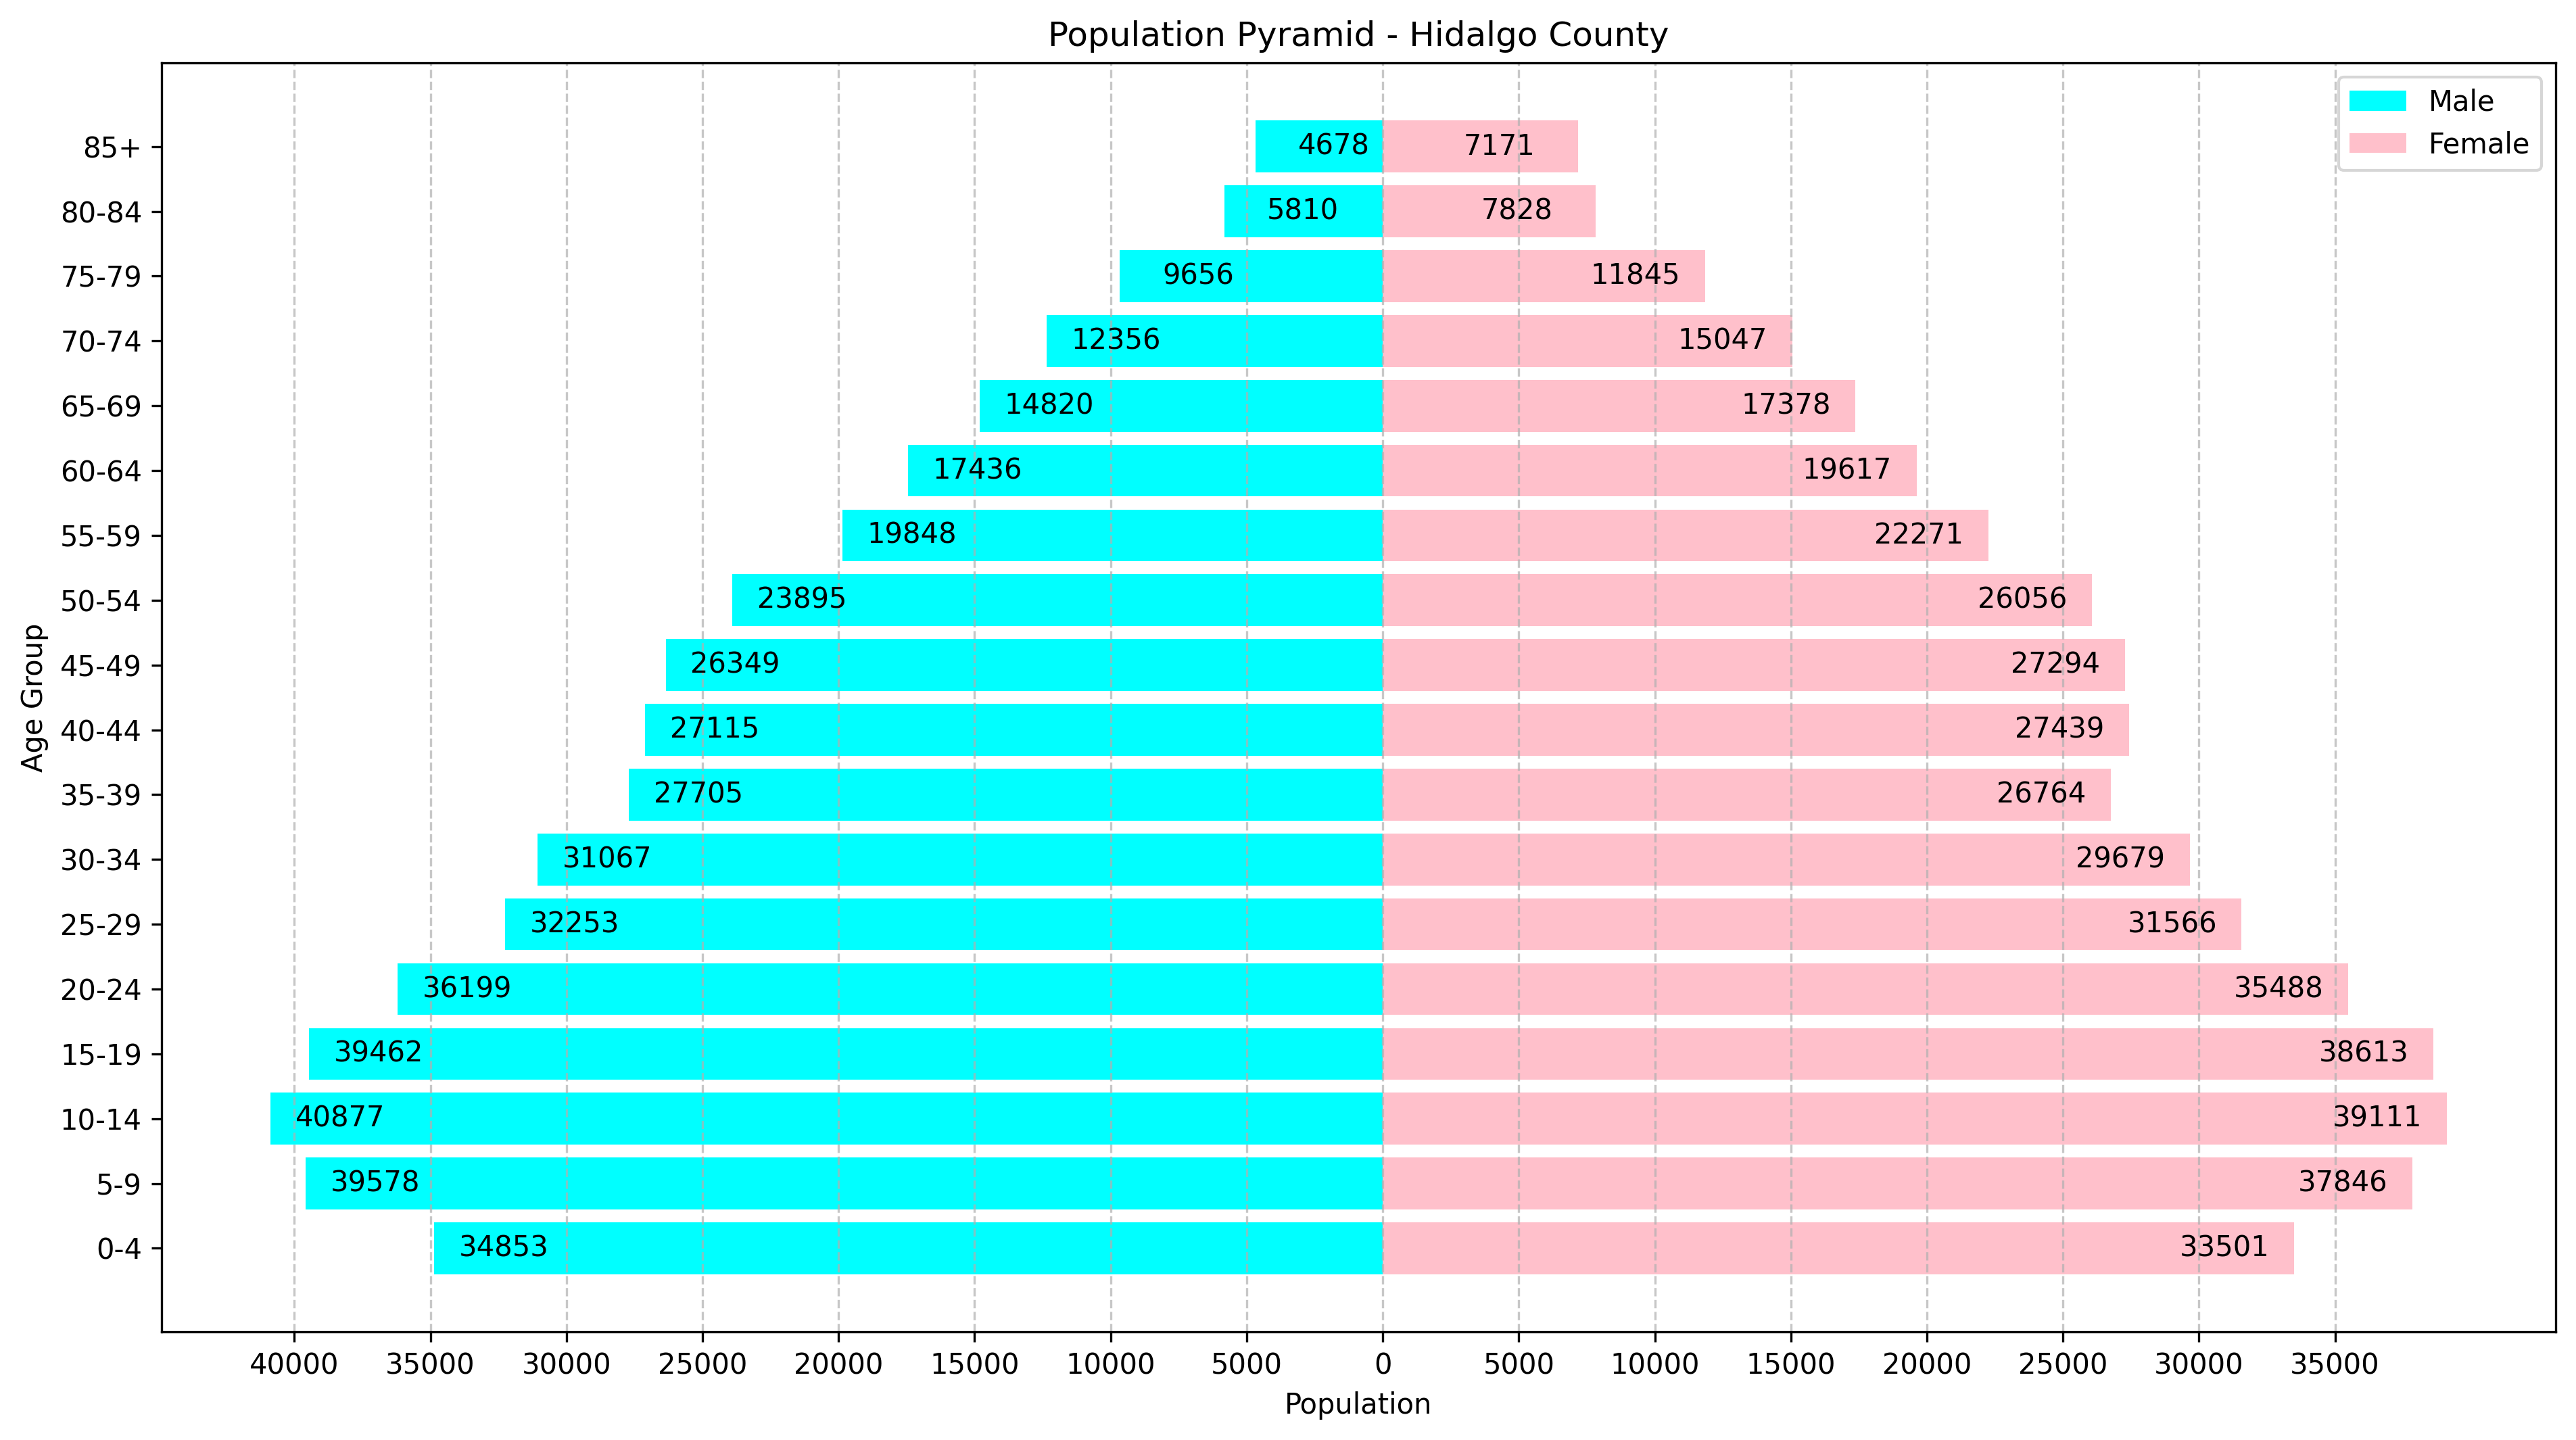

In [ ]:
df_hidalgo = filtered_df[filtered_df['CTYNAME'] == 'Hidalgo County']
data_list = df_hidalgo.values.tolist()
data_list = data_list[0]
male = data_list[1:len(data_list):2]
female = data_list[2:len(data_list):2]

df_hidalgo = pd.DataFrame({
    "Age": age,
    "Male": male,
    "Female": female
})

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12.8, 7.2), dpi=300)

# Plot Male Population (negative for left alignment)
male_bars = ax.barh(df_hidalgo["Age"], -df_hidalgo["Male"], color='cyan', label='Male')

# Plot Female Population
female_bars = ax.barh(df_hidalgo["Age"], df_hidalgo["Female"], color='pink', label='Female')

for bar in male_bars:
    ax.text(bar.get_width() + 4200, bar.get_y() + bar.get_height() / 2,
            f"{-int(bar.get_width())}", va='center', ha='right', color='black', fontsize=10)

# Annotate Female Bars
for bar in female_bars:
    ax.text(bar.get_width() - 4200, bar.get_y() + bar.get_height() / 2,
            f"{int(bar.get_width())}", va='center', ha='left', color='black', fontsize=10)

# Add Labels and Title
ax.set_xlabel("Population")
ax.set_ylabel("Age Group")
ax.set_title("Population Pyramid - Hidalgo County")
ax.legend(loc="upper right")

# Add X-ticks
xticks = list(range(-40000, 40000, 5000))  # Adjust based on population range
ax.set_xticks(xticks)
ax.set_xticklabels([abs(x) for x in xticks])

# Add Gridlines
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Display the plot
plt.tight_layout()
plt.savefig("Hidalgo.png", dpi=300)
plt.show()